In [18]:
## 경고문구 없애기
import warnings
warnings.filterwarnings('ignore')

---
---

# 통계분석 in python : 통계량 검정(모수검정, 비모수검정)

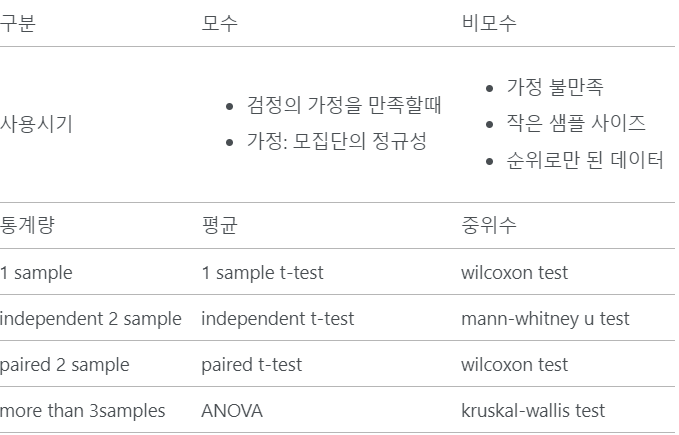

## 01. 정규성 검정
- 패키지
    - Kolmogorov Smirnow
    - Shapiro Wilk

### Kolmogorov Smirnov
- 표본수가 많을 때, 2개의 분포의 동질성을 확인하는 검정이다.
- 귀무가설 : 두 분포가 동일하다. 즉, 정규분포를 따른다.

In [1]:
from scipy.stats import kstest, norm

data = norm.rvs(size = 1000)
kstest(data, 'norm')

KstestResult(statistic=0.024302809923374302, pvalue=0.5874204532216526)

=> p-value가 0.05크기 때문에 귀무가설을 기각하지 못한다. 즉, 표본이 정규분포를 따른다.

### Shapiro Wilk
- 표본수가 많지 않을 때, (보통 50개 미만) 사용하는 검정이다. Kolmogorov와 다르게 정규성 검정에서만 쓸 수 있다.
- 귀무가설 : 정규분포를 따른다.

In [2]:
from scipy.stats import shapiro, norm

data = norm.rvs(size=40)
shapiro(data)

ShapiroResult(statistic=0.9795535802841187, pvalue=0.6729686856269836)

=> p-value가 0.05크기 때문에 귀무가설을 기각하지 못한다. 즉, 표본이 정규분포를 따른다.

---
---

## 02. 두 표본의 등분산성 검정
- '독립된 두 표본'의 평균 검정은 등분산성을 만족해야 한다. 따라서 두 표본의 평균 검정 전에 사용한다.
- 패키지
    - Barlett : 비정규성에 민감하기 때문에 정규성을 따를 때만 사용해야하는 검정 방법.
    - levene : 정규분포와 관계없이 연속적인 분포로부터 데이터를 구했을 때 사용하는 검정 방법.
    - fligner
    - 정규성을 가정할 수 없을 때에는 Levene 검정을 사용하는 것이 좋지만, 정규성이 확실하다면 Bartlett 검정을 사용하는 것이 정확하다.

In [21]:
from scipy.stats import bartlett, fligner, levene

data1 = np.arange(1,100,10)
data2 = np.arange(1,100,12)

print(bartlett(data1,data2))
print(levene(data1,data2))
print(fligner(data1,data2))


BartlettResult(statistic=0.05387296931411971, pvalue=0.8164560627928433)
LeveneResult(statistic=0.05275571002979154, pvalue=0.8210765257077993)
FlignerResult(statistic=0.271365492595865, pvalue=0.6024172558183811)


=> 세 모델의 귀무가설은 두 표본의 분산이 동일하다이다.

p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 두 표본의 분산은 동일하다고 볼 수 있다.

---
---

## 03. 일표본 검정 ( 1 sample t-test)
- 모수 : 1 sample t-tetst
- 비모수 : wilcoxon test

### 03-1. 1 sample t-test
- 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교하고자 할 때 사용하는 검정방법
- 가정(조건)
    - 모집단의 구성요소들이 정규분포를 이룬다는 가정! (일반적으로 표본의 크기가 30보다 클 경우, 중심극한정리에 따라 표본이 정규분포를 따른다.)
    - 종속변수는 연속형 변수이어야 하며, 검증하고자 하는 기준값이 있어야 한다.

In [7]:
import numpy as np
import scipy as sp
import scipy.stats as stats

one_sample = [170.0, 180.0, 188.7, 173.7, 175.3]

result1 = stats.ttest_1samp(one_sample, popmean = 160)
result2 = stats.ttest_1samp(one_sample, popmean = 177.54)

print(np.mean(one_sample))
print(result1)
print(result2)

177.54000000000002
Ttest_1sampResult(statistic=5.4492550531541735, pvalue=0.005509200401916088)
Ttest_1sampResult(statistic=8.82993977952728e-15, pvalue=0.9999999999999933)


=> one_sample의 평균은 177.54이다. 

따라서 result1의 평균이 같다는 귀무가설은 기각되고, result2의 평균이 같다는 귀무가설을 기각되지 못한다.

---

### 03-2. wilcoxon test (1 sample)
- 단일표본이 정규분포를 이루지 않을 때, 중위수값을 특정 기준값과 비교하고자 할 때 사용하는 검정방법

In [10]:
# 데이터 불러오기
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/babyboom.csv")
girl_data = data[data['gender']==1]
print(data.head())
print(girl_data[['weight']].describe())

   time  gender  weight  minutes
0     5       1    3837        5
1   104       1    3334       64
2   118       2    3554       78
3   155       2    3838      115
4   257       2    3625      177
            weight
count    18.000000
mean   3132.444444
std     631.582534
min    1745.000000
25%    2711.000000
50%    3381.000000
75%    3517.250000
max    3866.000000


=> girl_data의 weight 값의 중위수는 3381이다.

In [11]:
# 정규성 확인
from scipy.stats import shapiro

shapiro(girl_data['weight'])

ShapiroResult(statistic=0.8702831864356995, pvalue=0.017984945327043533)

=> p-value가 0.05보다 작으므로 정규분포를 이룬다는 귀무가설을 기각한다. 즉, data는 정규분포를 따르지 않는다.

- density plot으로 정규분포를 이루는지 확인 가능하다.

<AxesSubplot:xlabel='weight', ylabel='Density'>

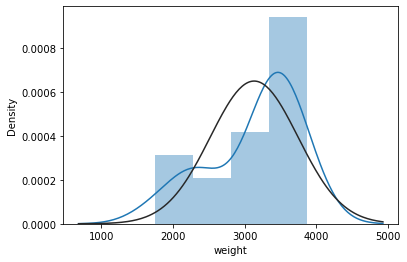

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(girl_data.loc[:,'weight'], fit = stats.norm)

In [26]:
# wilcoxon 함수 적용
from scipy.stats import wilcoxon

print(wilcoxon(girl_data['weight']-3381))
print(wilcoxon(girl_data['weight']-2000))

WilcoxonResult(statistic=65.5, pvalue=0.39273834228515625)
WilcoxonResult(statistic=3.0, pvalue=3.814697265625e-05)


=> wilcoxon의 귀무가설은 '중위값이 0이다.' 이다. 따라서, 검정하고 싶은 값을 빼주는 것이다.

=> 중위값 3381을 넣었을 때는 p-value가 0.05보다 크므로 귀무가설을 기각하지 못하고, 2000을 넣었을 때는 p-value가 0.05보다 작으므로 귀무가설을 기각.

---
---

## 04. 독립표본 검정(Independent paired 2 samples)
- 모수 : Independent t-test
- 비모수 : Mann Whitney(Independent 2 samples)

### 04-1. Independent t-test
- 두 개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정방법
- 가정(조건)
    - 두 모집단은 정규성을 만족해야 한다.
    - 두 모집단은 서로 독립적이어야 한다.(독립성 검정방법 따로 있음)
    - 두 모집단의 분산이 서로 같음을 의미하는 등분산성 가정을 확인해야 한다.
    - 독립변수는 범주형, 종속변수는 연속형이어야 한다.

In [27]:
# 데이터의 정규성, 등분산성 확인 => 정규성, 등분산성 만족

from scipy.stats import shapiro
from scipy.stats import bartlett
male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]
print(shapiro(male))
print(shapiro(female))
print(bartlett(male,female))

ShapiroResult(statistic=0.9305859208106995, pvalue=0.6003715991973877)
ShapiroResult(statistic=0.9557387828826904, pvalue=0.7780438661575317)
BartlettResult(statistic=0.8369187644316614, pvalue=0.3602794952403162)


In [28]:
# ttest_ind

from scipy.stats import ttest_ind

two_samples = stats.ttest_ind(male,female)

print(np.mean(male))b
print(np.mean(female))
print(two_samples)

83.8
72.24
Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)


=> 귀무가설은 '두 개의 모평균에는 차이가 없다.'이다.

p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.

---

### 04-2. Mann Whitney(Independent 2 samples)
- 순위척도 자료를 가진 집단이나 집단의 표본수가 비교적 작아 정규성을 만족하지 못할 때, 독립된 두 집단 차이를 분석하는 방법

In [30]:
# 정규성 확인 => 정규성 만족 x
from scipy.stats import shapiro

male = [75, 85, 150, 72.5, 86.5]
female = [63.2, 76, 52, 60, 62]
print(shapiro(male))
print(shapiro(female))

ShapiroResult(statistic=0.7194008231163025, pvalue=0.01511599775403738)
ShapiroResult(statistic=0.9341663122177124, pvalue=0.6250438690185547)


In [31]:
from scipy.stats import mannwhitneyu

print(np.percentile(male,50))
print(np.percentile(female,50))
mannwhitneyu(male, female)

85.0
62.0


MannwhitneyuResult(statistic=2.0, pvalue=0.01835692818135205)

=> p-value가 0.05보다 작으므로, 귀무가설 '두 집단의 중위값은 같다.'를 기각한다.

즉, 두 집단의 중위수값은 같지 않다.

---
---

### 05. 대응표본(paired 2 samples) 검정
- 모수 : paired T-test
- 비모수 : Wilcoxon (paired smaples)

### 05-1. paired T-test
- 단일모집단에 대해 두 번의 처리를 가했을 때, 두개의 처리에 따른 평균의 차이를 비교하고자 할 때 사용하는 검정방법
- 가정(조건)
    - 모집단의 관측값이 정규성을 만족해야 한다.
    - 관측값들은 서로 독립적이지 않음.
    - 종속변수는 연속형 변수이어야 한다.

In [35]:
# 데이터 확인 => 정규성 만족
from scipy.stats import shapiro
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]
print(shapiro(baseline))
print(shapiro(follow_up))

ShapiroResult(statistic=0.9611198306083679, pvalue=0.809967577457428)
ShapiroResult(statistic=0.8478229641914368, pvalue=0.0705145075917244)


In [36]:
# ttest_rel

from scipy.stats import ttest_rel

paired_result = stats.ttest_rel(baseline, follow_up)
print(np.mean(baseline))
print(np.mean(follow_up))
print(paired_result)

78.41111111111111
71.5
Ttest_relResult(statistic=3.6681166519351103, pvalue=0.006326650855933662)


=> p-value가 0.05보다 작으므로, 귀무가설 '데이터 변화에 차이가 없다.'를 기각한다.

즉, 두 데이터 변화에 차이가 있다.(대립가설)

---

### 05-2. Wilcoxon (paired samples)
- 정규성 만족하지 못할 때 두 대응표본의 차이를 비교할때 사용하는 검정방법
- 단일표본에서 사용했던 wilcoxon 패키지이다. 정규성을 만족하지 않을 경우에 wilcoxon 함수를 쓰되 두 표본이 되었음으로, y에 다른 데이터를 넣어주어야 한다.

In [38]:
from scipy.stats import wilcoxon
wilcoxon(baseline, y=follow_up)

WilcoxonResult(statistic=0.0, pvalue=0.00390625)

=> p-value는 0.05보다 작으므로, 귀무가설 '중위값이 같다.'를 기각하고

대립가설 '중위갑이 같지 않다.'를 채택한다.